<a href="https://colab.research.google.com/github/gsepulv1/ST0245-08/blob/master/accidentes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importando algunas librerías que utilizaremos

# Networkx para grafos
import networkx as nx

# Pandas
import pandas as pd

# Mostrar imágenes
from IPython.display import HTML

# Mathplotlib
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [2]:
from google.colab import files
uploades = files.upload()

Saving accidentes.csv to accidentes (1).csv


In [5]:
df = pd.read_csv('accidentesny.csv',sep=';')

La ciudad de Nueva York ha experimentado un aumento en el número de accidentes en las carreteras de la ciudad. Para todos los accidentes reportados, han recopilado detalles para cada accidente y han estado manteniendo registros durante el último año y medio. La ciudad te ha contratado para que construyas visualizaciones que los ayuden a identificar patrones en accidentes, lo que los ayudaría a tomar acciones preventivas para reducir la cantidad de accidentes en el futuro. Tienen ciertos parámetros como municipio, hora del día, motivo del accidente, etc.

In [6]:
df.columns

Index(['DATE', 'TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE',
       'ON STREET NAME', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
      dtype='object')

In [7]:
df.describe()

,ZIP CODE,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID
count,103361.000000,103392.000000,103392.000000,103392.000000,103392.000000,103392.000000,103392.000000,1.033920e+05
mean,10875.582734,0.048843,0.000455,0.029248,0.000106,0.193622,0.000300,4.084687e+06
std,542.936922,0.226909,0.021316,0.170101,0.010314,0.615376,0.017863,8.570518e+04
min,10000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.511951e+06
25%,10454.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.979960e+06
50%,11208.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.114872e+06
75%,11354.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.154839e+06
max,11697.000000,6.000000,1.000000,3.000000,1.000000,18.000000,2.000000,4.195347e+06


In [8]:
df

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/26/2018,"0,508333333",BRONX,10454.0,40808987,-73911316,NaN,0,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,3988123,Sedan,NaN,NaN,NaN,NaN
1,09/25/2018,"0,6875",BROOKLYN,11236.0,40636005,-7391251,FLATLANDS AVENUE,1,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,3987962,Sedan,NaN,NaN,NaN,NaN
2,08/22/2019,"0,8125",QUEENS,11101.0,4075549,-7393953,NaN,0,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,4193132,Sedan,NaN,NaN,NaN,NaN
3,09/23/2018,"0,548611111",QUEENS,11367.0,NaN,NaN,MAIN STREET,0,0,1,0,0,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,3985962,Bike,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
4,08/20/2019,"0,944444444",BRONX,10468.0,40868336,-7390127,NaN,0,0,0,0,1,0,View Obstructed/Limited,Unspecified,NaN,NaN,NaN,4192111,Sedan,Sedan,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103387,43499,"0,71875",MANHATTAN,10001.0,"4,07502E+16",-73998604,9 AVENUE,0,0,0,0,1,0,Passing or Lane Usage Improper,Unspecified,NaN,NaN,NaN,4089852,Box Truck,Taxi,NaN,NaN,NaN
103388,02/13/2019,"0,766666667",BROOKLYN,11224.0,40580326,-7398559,NaN,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,4080450,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
103389,43499,"0,84375",MANHATTAN,10036.0,"4,07566E+16",-7398039,NaN,0,0,0,0,0,0,Backing Unsafely,Unspecified,NaN,NaN,NaN,4089891,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
103390,02/26/2019,"0,361111111",MANHATTAN,10017.0,40756607,-7397651,MADISON AVENUE,0,0,0,0,0,0,Failure to Yield Right-of-Way,Unspecified,NaN,NaN,NaN,4087246,Bus,Sedan,NaN,NaN,NaN


Tenemos las siguientes columnas
1. BOROUGH: La localidad donde ocurrió el accidente
2. COLLISION_ID: Un identificador único para esta colisión o accidente
3. CONTRIBUTING FACTOR VEHICLE (1, 2, 3, 4, 5): Motivo del accidente
4. CROSS STREET NAME: Cruce de calle más cercana al lugar del accidente
5. DATE: Fecha del accidente
6. TIME: Hora del accidente
7. LATITUDE: Latitud del accidente
8. LONGITUDE: Longitud del accidente
9. NUMBER OF (CYCLISTS, MOTORISTS, PEDESTRIANS) INJURED: Cantidad de personas lesionadas por categoría
10. NUMBER OF (CYCLISTS, MOTORISTS, PEDESTRIANS) KILLED: Cantidad de personas muertas por categoría
11. ON STREET NAME: Calle donde ocurrió el accidente
12. VEHICLE TYPE CODE (1, 2, 3, 4, 5): Tipos de vehículos involucrados en el accidente
13. ZIP CODE: Código postal de la ubicación del accidente


1. **Agrupe los datos disponibles mensualmente y genere un gráfico de líneas de accidentes a través del tiempo.**
¿Ha aumentado el número de accidentes durante el último año y medio?
Pista: Puede encontrar útiles las funciones pandas to_datetime () y dt.to_period ().

In [9]:
aux1= df.groupby('DATE').agg({'COLLISION_ID':'count'})

In [10]:
aux1

,COLLISION_ID
DATE,
01/14/2019,1
01/17/2019,1
01/24/2019,133
01/25/2019,154
01/26/2019,131
...,...
43803,448
43804,355
43805,441


In [11]:
from google.colab import files
uploades = files.upload()

Saving accidentesny2.csv to accidentesny2 (2).csv


In [13]:
df2=pd.read_csv('accidentesny2.csv',sep=';')

In [14]:
df2['DATE'] = pd.to_datetime(df2['DATE'])

In [15]:
aux2= df2.groupby('DATE').agg({'COLLISION_ID':'count'})

In [16]:
aux2

,COLLISION_ID
DATE,
2018-05-07,1
2018-05-09,3
2018-05-10,4
2018-05-11,1
2018-05-12,3
...,...
2019-08-20,360
2019-08-21,333
2019-08-22,333


In [17]:
pd.Series(df2.DATE).dt.to_period('M')

0         2018-09
1         2018-09
2         2019-08
3         2018-09
4         2019-08
           ...   
103387    2019-03
103388    2019-02
103389    2019-03
103390    2019-02
103391    2019-02
Name: DATE, Length: 103392, dtype: period[M]

In [18]:
aux3 =df2.groupby(pd.Series(df2.DATE).dt.to_period('M')).agg({'COLLISION_ID':'count'})

In [19]:
aux3

,COLLISION_ID
DATE,
2018-05,24
2018-06,29
2018-07,8756
2018-08,12644
2018-09,10905
2018-11,1
2018-12,16
2019-01,1125
2019-02,3926


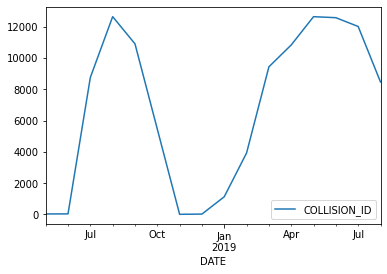

In [20]:
df2.groupby(pd.Series(df2.DATE).dt.to_period('M')).agg({'COLLISION_ID':'count'}).plot()

**2.	¿Cómo varía el número de accidentes a lo largo de una sola semana?** Genere un gráfico de barras basado en el recuento de accidentes por día de la semana. Pista: Puede encontrar útil la función dt.weekday.

In [33]:
df2['dia'] = pd.to_datetime(pd.Series(df2.DATE)).dt.weekday

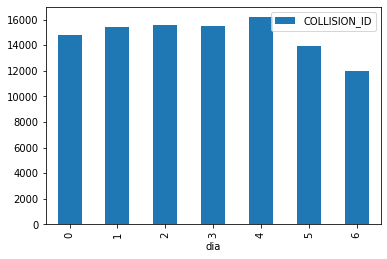

In [34]:
df2.groupby(df2.dia).agg({'COLLISION_ID':'count'}).plot(kind='bar')

**3.	Genere un gráfico de barras del número total de accidentes en cada localidad **

In [36]:
aux4= df2.groupby(df2.BOROUGH).agg({'COLLISION_ID':'count'})

In [37]:
aux4

,COLLISION_ID
BOROUGH,
BRONX,16813
BROOKLYN,33424
MANHATTAN,20616
QUEENS,29524
STATEN ISLAND,3015


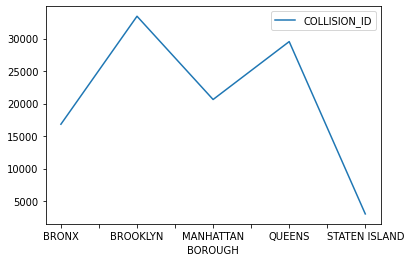

In [39]:
df2.groupby(df2.BOROUGH).agg({'COLLISION_ID':'count'}).plot()